In [1]:
from time import time

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from FlappyAgents.abst_flappy_agent import FlappyAgent
from FlappyAgents.qlearning_flappy_agent import QlearningAgent
import playyy

pygame 2.1.2 (SDL 2.0.18, Python 3.10.8)
Hello from the pygame community. https://www.pygame.org/contribute.html
couldn't import doomish
Couldn't import doom


In [2]:
#######################################
# RUN THIS TO RESET LEARNING PROGRESS #
#######################################

agent: FlappyAgent = QlearningAgent()
trainedlvl = -1

results = []
trainingsizes = []
qvalues = []
times = []
frames = []

In [3]:

playsize = 100
i = 0
stepsize = 100
for i in range(0, 500 + 1, stepsize):
	if trainedlvl < i:
		# SETUP
		#agent: FlappyAgent = DeepQAgent()

		start = int(time() * 1000)
		_frames = playyy.train(stepsize, agent)
		duration = int(time() * 1000) - start
		print(i, duration / 1000)
		# write(agent, filestr)

		#vals = read("results/qvalues_4000")
		#print(filestr)
		#vals = read(filestr)
		#agent.q_values = vals

		#print(len(agent.q_values))
		rundata = playyy.run_game(playsize, agent)
		
		results.append(rundata)

		
		# for result in results:
		# 	sum = 0
		# 	for v in result:
		# 		sum = sum + v
		# 	result_sums.append(sum)

		# 	mini.append(np.min(result))
		# 	result_q1.append(np.quantile(result, 0.25))
		# 	result_q2.append(np.quantile(result, 0.5))
		# 	result_q3.append(np.quantile(result, 0.75))
		# 	maxi.append(np.max(result))
		frames.append(_frames)
		trainingsizes.append(i)	
		qvalues.append(len(agent.q_values))
		times.append(duration)
		trainedlvl = i

0 1.278
100 1.179
200 1.225
300 1.227
400 1.303
500 1.275


In [4]:
result_sums = []
mean = []

mini = []
result_q1 = []
result_q2 = []
result_q3 = []
maxi = []

for result in results:
	result_sums.append(np.sum(result))
	mean.append(np.mean(result))

	mini.append(np.min(result))
	result_q1.append(np.quantile(result, 0.25))
	result_q2.append(np.quantile(result, 0.5))
	result_q3.append(np.quantile(result, 0.75))
	maxi.append(np.max(result))

print(len(result_sums))
print(len(trainingsizes))

df = pd.DataFrame({'trainingsizes': trainingsizes, "frames": frames, "results": results, 'result_sums': result_sums, "mean": mean, "qvalues": qvalues, "times": times, "mini": mini, "result_q1": result_q1, "result_q2": result_q2, "result_q3": result_q3, "maxi": maxi})
df


6
6


,trainingsizes,frames,results,result_sums,mean,qvalues,times,mini,result_q1,result_q2,result_q3,maxi
0,0,"[61, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 6...","[-5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5....",-500.0,-5.00,510,1278,-5.0,-5.0,-5.0,-5.0,-5.0
1,100,"[62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 6...","[-5.0, -5.0, -5.0, -4.0, -5.0, -5.0, -5.0, -5....",-478.0,-4.78,655,1179,-5.0,-5.0,-5.0,-5.0,-4.0
2,200,"[61, 62, 62, 62, 57, 62, 62, 62, 62, 62, 62, 6...","[-5.0, -5.0, -5.0, -5.0, -5.0, -4.0, -5.0, -4....",-481.0,-4.81,848,1225,-5.0,-5.0,-5.0,-5.0,-4.0
3,300,"[62, 62, 62, 62, 67, 62, 62, 65, 62, 62, 62, 6...","[-4.0, -5.0, -3.0, -3.0, -3.0, -4.0, -4.0, -5....",-438.0,-4.38,1016,1227,-5.0,-5.0,-4.0,-4.0,-2.0
4,400,"[63, 70, 68, 77, 98, 62, 62, 71, 62, 62, 62, 6...","[-4.0, -4.0, -5.0, -5.0, -5.0, -4.0, -4.0, -5....",-460.0,-4.60,1220,1303,-5.0,-5.0,-5.0,-4.0,-3.0
5,500,"[62, 62, 70, 102, 70, 62, 62, 62, 62, 103, 67,...","[-5.0, -5.0, -5.0, -5.0, -4.0, -5.0, -5.0, -5....",-486.0,-4.86,1424,1275,-5.0,-5.0,-5.0,-5.0,-4.0


In [5]:
# df = pd.read_table("savepoint.csv", sep=",", index_col=[0]) 
# df

[Text(0, 0.5, 'Duration in milliseconds'),
 Text(0.5, 0, 'Iteration'),
 Text(0.5, 1.0, 'Training duration of vs. Number of training iterations')]

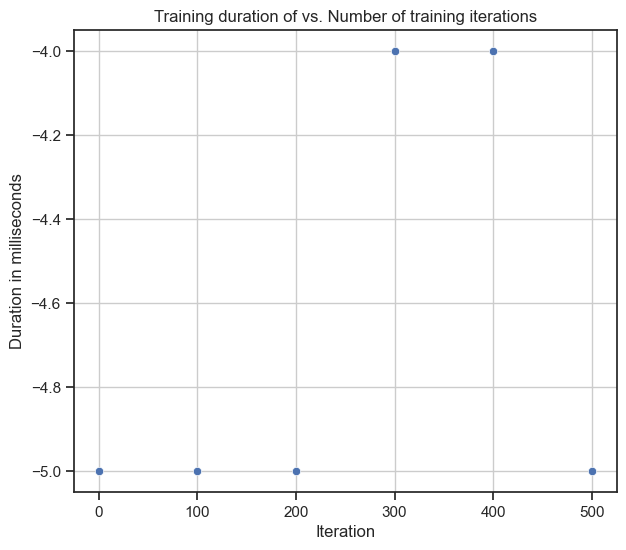

: 

In [8]:
from matplotlib.pyplot import xlabel


# sns.color_palette("tab10")


sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 6))
ax.yaxis.grid(True)
ax.xaxis.grid(True)
# ax.set_yscale("log")



# sns.scatterplot(data=df, x="trainingsizes", y="mini", palette="vlag")
# ax.set(ylabel="", xlabel="Iteration", title=" vs. Number of training iterations")

# sns.scatterplot(data=df, x="trainingsizes", y="result_q1", palette="vlag")
# ax.set(ylabel="", xlabel="Iteration", title=" vs. Number of training iterations")

# sns.scatterplot(data=df, x="trainingsizes", y="result_q2", palette="vlag")
# ax.set(ylabel="", xlabel="Iteration", title=" vs. Number of training iterations")

# sns.scatterplot(data=df, x="trainingsizes", y="mean", palette="vlag")
# ax.set(ylabel="Score", xlabel="Iteration", title="Mean score of 100 attempts vs. Number of training iterations")

# sns.scatterplot(data=df, x="trainingsizes", y="result_q3", palette="vlag")
# ax.set(ylabel="", xlabel="Iteration", title=" vs. Number of training iterations")

# sns.scatterplot(data=df, x="trainingsizes", y="maxi", palette="vlag")
# ax.set(ylabel="", xlabel="Iteration", title=" vs. Number of training iterations")



# sns.scatterplot(data=df, x="trainingsizes", y="times", palette="vlag")
# ax.set(ylabel="Duration in milliseconds", xlabel="Iteration", title="Training duration of vs. Number of training iterations")

# sns.scatterplot(data=df, x="trainingsizes", y="qvalues", palette="vlag")
# ax.set(ylabel="Duration in milliseconds", xlabel="Iteration", title="Training duration of vs. Number of training iterations")

# TODO
# sns.scatterplot(data=df, x="trainingsizes", y="framecount", palette="vlag")
# ax.set(ylabel="Duration in milliseconds", xlabel="Iteration", title="Training duration of vs. Number of training iterations")


In [7]:
# df.to_csv('savepoint.csv') 
# filestr: str = 'results/qvalues_' + str(trainedlvl)
# playyy.write(agent, filestr)